In \[1\]:

    import warnings
    warnings.filterwarnings("ignore")

In \[2\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

In \[3\]:

    df=pd.read_csv("/home/divum/ML/DATASETS/Brain_Stroke_dataset.csv")

In \[4\]:

    df.head()

Out\[4\]:

|     | gender | age  | hypertension | heart_disease | ever_married | work_type     | Residence_type | avg_glucose_level | bmi  | smoking_status  | stroke |
|-----|--------|------|--------------|---------------|--------------|---------------|----------------|-------------------|------|-----------------|--------|
| 0   | Male   | 67.0 | 0            | 1             | Yes          | Private       | Urban          | 228.69            | 36.6 | formerly smoked | 1      |
| 1   | Male   | 80.0 | 0            | 1             | Yes          | Private       | Rural          | 105.92            | 32.5 | never smoked    | 1      |
| 2   | Female | 49.0 | 0            | 0             | Yes          | Private       | Urban          | 171.23            | 34.4 | smokes          | 1      |
| 3   | Female | 79.0 | 1            | 0             | Yes          | Self-employed | Rural          | 174.12            | 24.0 | never smoked    | 1      |
| 4   | Male   | 81.0 | 0            | 0             | Yes          | Private       | Urban          | 186.21            | 29.0 | formerly smoked | 1      |

In \[5\]:

    df.columns

Out\[5\]:

    Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
           'smoking_status', 'stroke'],
          dtype='object')

In \[6\]:

    df.shape

Out\[6\]:

    (4981, 11)

In \[7\]:

    df.describe()

Out\[7\]:

|       | age         | hypertension | heart_disease | avg_glucose_level | bmi         | stroke      |
|-------|-------------|--------------|---------------|-------------------|-------------|-------------|
| count | 4981.000000 | 4981.000000  | 4981.000000   | 4981.000000       | 4981.000000 | 4981.000000 |
| mean  | 43.419859   | 0.096165     | 0.055210      | 105.943562        | 28.498173   | 0.049789    |
| std   | 22.662755   | 0.294848     | 0.228412      | 45.075373         | 6.790464    | 0.217531    |
| min   | 0.080000    | 0.000000     | 0.000000      | 55.120000         | 14.000000   | 0.000000    |
| 25%   | 25.000000   | 0.000000     | 0.000000      | 77.230000         | 23.700000   | 0.000000    |
| 50%   | 45.000000   | 0.000000     | 0.000000      | 91.850000         | 28.100000   | 0.000000    |
| 75%   | 61.000000   | 0.000000     | 0.000000      | 113.860000        | 32.600000   | 0.000000    |
| max   | 82.000000   | 1.000000     | 1.000000      | 271.740000        | 48.900000   | 1.000000    |

In \[8\]:

    df["gender"].replace(["Male","Female"],[0,1],inplace=True)
    df["ever_married"].replace(["Yes","No"],[1,0],inplace=True)
    df["work_type"].replace(["Private","Self-employed","children","Govt_job"],[1,2,3,4],inplace=True)
    df["Residence_type"].replace(["Urban","Rural"],[1,2],inplace=True)
    df["smoking_status"].replace(["formerly smoked","never smoked","smokes","Unknown"],[1,2,3,4],inplace=True)

In \[9\]:

    df.head()

Out\[9\]:

|     | gender | age  | hypertension | heart_disease | ever_married | work_type | Residence_type | avg_glucose_level | bmi  | smoking_status | stroke |
|-----|--------|------|--------------|---------------|--------------|-----------|----------------|-------------------|------|----------------|--------|
| 0   | 0      | 67.0 | 0            | 1             | 1            | 1         | 1              | 228.69            | 36.6 | 1              | 1      |
| 1   | 0      | 80.0 | 0            | 1             | 1            | 1         | 2              | 105.92            | 32.5 | 2              | 1      |
| 2   | 1      | 49.0 | 0            | 0             | 1            | 1         | 1              | 171.23            | 34.4 | 3              | 1      |
| 3   | 1      | 79.0 | 1            | 0             | 1            | 2         | 2              | 174.12            | 24.0 | 2              | 1      |
| 4   | 0      | 81.0 | 0            | 0             | 1            | 1         | 1              | 186.21            | 29.0 | 1              | 1      |

In \[10\]:

    df.duplicated().sum()

Out\[10\]:

    0

In \[11\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 4981 entries, 0 to 4980
    Data columns (total 11 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   gender             4981 non-null   int64  
     1   age                4981 non-null   float64
     2   hypertension       4981 non-null   int64  
     3   heart_disease      4981 non-null   int64  
     4   ever_married       4981 non-null   int64  
     5   work_type          4981 non-null   int64  
     6   Residence_type     4981 non-null   int64  
     7   avg_glucose_level  4981 non-null   float64
     8   bmi                4981 non-null   float64
     9   smoking_status     4981 non-null   int64  
     10  stroke             4981 non-null   int64  
    dtypes: float64(3), int64(8)
    memory usage: 428.2 KB

In \[12\]:

    def corr(dataset,threshold):
        col_corr=set()
        corr_matrix=dataset.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i,j])>threshold:
                    colname=corr_matrix.columns[i]
                    col_corr.add(colname)
        return col_corr

In \[13\]:

    x=df.drop("stroke",axis="columns")

In \[14\]:

    x.values

Out\[14\]:

    array([[  0.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
           [  0.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
           [  1.  ,  49.  ,   0.  , ..., 171.23,  34.4 ,   3.  ],
           ...,
           [  1.  ,  45.  ,   1.  , ...,  95.02,  31.8 ,   3.  ],
           [  0.  ,  40.  ,   0.  , ...,  83.94,  30.  ,   3.  ],
           [  1.  ,  80.  ,   1.  , ...,  83.75,  29.1 ,   2.  ]])

In \[15\]:

    y=df.stroke

In \[16\]:

    y

Out\[16\]:

    0       1
    1       1
    2       1
    3       1
    4       1
           ..
    4976    0
    4977    0
    4978    0
    4979    0
    4980    0
    Name: stroke, Length: 4981, dtype: int64

In \[17\]:

    plt.figure(figsize=(12,10))
    cor=x.corr()
    sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
    plt.show()

<img src="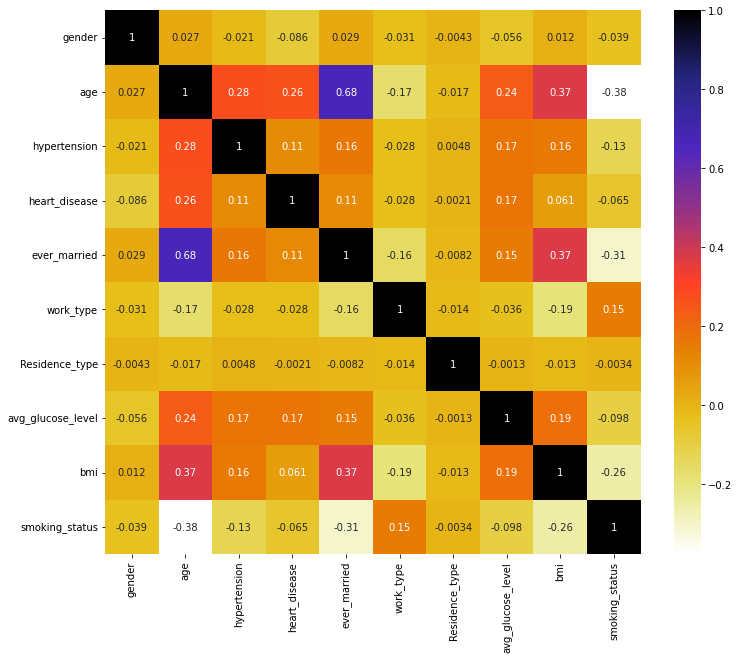%0A" class="jp-needs-light-background" />

In \[18\]:

    corr(x,0.7)

Out\[18\]:

    set()

In \[19\]:

    from sklearn.preprocessing import StandardScaler 

In \[20\]:

    Scaler=StandardScaler()

In \[21\]:

    X_scaled=Scaler.fit_transform(x)

In \[22\]:

    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=10)

# Model Training<a href="#Model-Training" class="anchor-link">¶</a>

In \[23\]:

    from sklearn.linear_model import LogisticRegression

In \[24\]:

    m=LogisticRegression()
    m.fit(X_train,Y_train)

Out\[24\]:

    LogisticRegression()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LogisticRegression

    LogisticRegression()

In \[25\]:

    pre=m.predict(X_test)

In \[26\]:

    pre

Out\[26\]:

    array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0])

In \[27\]:

    print(accuracy_score(pre,Y_test))

    0.950852557673019

In \[28\]:

    from sklearn.metrics import confusion_matrix

In \[29\]:

    cm=confusion_matrix(pre,Y_test)
    cm

Out\[29\]:

    array([[948,  49],
           [  0,   0]])

# Decision Tree<a href="#Decision-Tree" class="anchor-link">¶</a>

In \[30\]:

    from sklearn.tree import DecisionTreeClassifier

In \[31\]:

    m_d=DecisionTreeClassifier()
    m_d.fit(X_train,Y_train)

Out\[31\]:

    DecisionTreeClassifier()

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

DecisionTreeClassifier

    DecisionTreeClassifier()

In \[32\]:

    d_pre=m_d.predict(X_test)
    d_pre

Out\[32\]:

    array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
           0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
           1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
           0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0])

In \[33\]:

    print(accuracy_score(d_pre,Y_test))

    0.9087261785356068

In \[34\]:

    cm_d=confusion_matrix(d_pre,Y_test)
    cm_d

Out\[34\]:

    array([[899,  42],
           [ 49,   7]])

# Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>

In \[35\]:

    from sklearn.ensemble import RandomForestClassifier

In \[36\]:

    r_m=RandomForestClassifier(n_estimators=1000)
    r_m.fit(X_train,Y_train)

Out\[36\]:

    RandomForestClassifier(n_estimators=1000)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

    RandomForestClassifier(n_estimators=1000)

In \[37\]:

    r_pre=r_m.predict(X_test)

In \[38\]:

    print(accuracy_score(r_pre,Y_test))

    0.9488465396188566

In \[39\]:

    cm_r=confusion_matrix(r_pre,Y_test)
    cm_r

Out\[39\]:

    array([[946,  49],
           [  2,   0]])

# SVM CLASSIFICATION<a href="#SVM-CLASSIFICATION" class="anchor-link">¶</a>

In \[40\]:

    from sklearn import svm

In \[41\]:

    Svc_classifier = svm.SVC(kernel='linear', C=2.0).fit(X_train, Y_train)

In \[42\]:

    svc_pre=Svc_classifier.predict(X_test)

In \[43\]:

    print("Linear_kernel",accuracy_score(Y_test,svc_pre))

    Linear_kernel 0.950852557673019

In \[44\]:

    svc_cm=confusion_matrix(Y_test,svc_pre)
    svc_cm

Out\[44\]:

    array([[948,   0],
           [ 49,   0]])

In \[45\]:

    Svc_classifier_gamma = svm.SVC(kernel='rbf', gamma ="auto",C=1.0).fit(X_train, Y_train)

In \[46\]:

    svc_pre_gamma=Svc_classifier_gamma.predict(X_test)

In \[47\]:

    print("rbf kernel",accuracy_score(svc_pre_gamma,Y_test))

    rbf kernel 0.950852557673019

# RESULT<a href="#RESULT" class="anchor-link">¶</a>

## SVC & LOGISTIC REGRESSION Algorithm gives the best accuracy for BRAIN STROKE<a href="#SVC-&amp;-LOGISTIC-REGRESSION-Algorithm-gives-the-best-accuracy-for-BRAIN-STROKE" class="anchor-link">¶</a>

In \[ \]: